# Example Data Import
- Example data: A part of smart travel card data of Seoul Metropolitan Area (a single day)
- LeanUS - Class Files - Smart travel card
- There are 3 files
- "Transit_card_single_day_c.csv"
- "Station_code_ADMINC.xlsx"
- "Bus_line.xlsx"

In [1]:
from tqdm import tqdm
import pandas as pd
import os

In [2]:
data_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Lectures/2022-2_모빌리티데이터분석및활용/dataset'

In [3]:
data_file = 'Transit_card_single_day_c.csv'

In [4]:
data_path = os.path.join(data_dir, data_file)

In [5]:
Cdata = pd.read_csv(data_path)

In [6]:
Cdata.head(30) # 이건 raw 데이터가 아니라 교수님이 좀 편집한 데이터임. 

,Card_ID,Trip_Seq,Leg_Seq,User,Mode,Route,On_station,Off_station,On_hour,On_min,On_sec,Off_hour,Off_min,Off_sec
0,100001,1,1,normal,subway,20000000,424,328,17,25,55,17,50,15
1,100002,1,1,elderly,subway,20000000,204,313,17,9,1,17,34,57
2,100003,1,1,normal,subway,20000000,2618,2632,7,40,7,8,8,49
3,100003,1,2,normal,bus,11110049,9002129,9002129,8,14,21,8,15,1
4,100003,2,1,normal,subway,20000000,2632,2618,20,29,13,21,4,17
5,100004,1,1,disabled,subway,20000000,311,157,8,12,27,8,49,34
6,100004,2,1,disabled,subway,20000000,157,153,13,20,17,13,35,47
7,100004,3,1,disabled,subway,20000000,153,2642,14,12,15,14,58,17
8,100004,4,1,disabled,subway,20000000,2648,312,16,15,38,17,36,7
9,100004,5,1,disabled,subway,20000000,312,311,17,46,1,17,55,21


# Trip (Ride)-based Analysis

### Number of trips and its proportion

In [9]:
# Frequency : 각 수단(Mode)별 이용 빈도 분포
# Mode, card_ID, count
## Margins : 'All' 표시. 불필요한 concat을 쓰지 않아도 된다.
Freq_mode = pd.pivot_table(Cdata, values = 'Card_ID', index = ['Mode'], aggfunc = 'count', margins = True)
Freq_mode

,Card_ID
Mode,
bus,173093
subway,228400
All,401493


In [10]:
# Mode share : 각 수단별 수단분담률을 표현함. 버스 43.11%, 지하철 56.89%
mode_share = (Freq_mode/Freq_mode.loc['All']) * 100
mode_share.T

Mode,bus,subway,All
Card_ID,43.112333,56.887667,100.0


In [6]:
# Frequency by user type : 이용자 유형에 따른 통행빈도 분포. 
Freq_user = pd.pivot_table(Cdata, values = 'Card_ID', index = ['User'], aggfunc = 'count', margins = True)
Freq_user.T

User,disabled,elderly,kids,normal,teen,All
Card_ID,5451,31305,1422,349810,13505,401493


In [11]:
# Proportion
user_prop = (Freq_user/Freq_user.loc['All']) * 100
user_prop.T

User,disabled,elderly,kids,normal,teen,All
Card_ID,1.357682,7.797147,0.354178,87.127297,3.363695,100.0


In [12]:
# Mode share by user type
Freq_user_mode = pd.pivot_table(Cdata, values = 'Card_ID', index = ['Mode'], columns = ['User'], aggfunc = 'count', margins = True)

(Freq_user_mode/Freq_user_mode.loc['All']) * 100
# 노년층의 경우 : 지하철은 무료, 버스는 그렇지 않다. 따라서 노인의 99.6%가 지하철을 이용한다.
# 장애인의 경우 : 버스를 탑승하기 쉽지 않다. 적어도 이 데이터에서는 0%이다.

User,disabled,elderly,kids,normal,teen,All
Mode,,,,,,
bus,NaN,0.376937,67.018284,46.866013,59.829693,43.112333
subway,100.0,99.623063,32.981716,53.133987,40.170307,56.887667
All,100.0,100.000000,100.000000,100.000000,100.000000,100.000000


### Ditribution by time-of-day

In [14]:
# The numbr of trips across time-of-day (based on boarding hour)
# 시간에 따른 통행빈도 분포. 이를 아래에서 Plot하면 Peak-hour를 알 수 있다.
Freq_hour = pd.pivot_table(Cdata, values = 'Card_ID', index = ['On_hour'], aggfunc = 'count')
Freq_hour.T

On_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Card_ID,1171,204,86,76,1076,5326,13397,37404,40627,23138,...,17414,19591,23749,29293,41352,24967,17884,17391,15158,5036


<AxesSubplot:xlabel='On_hour'>

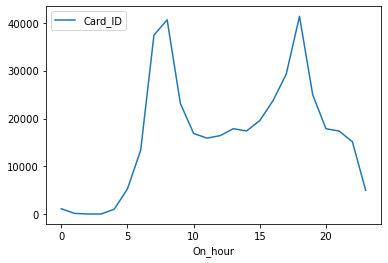

In [13]:
# Plot the distribution
Freq_hour.plot()

<AxesSubplot:xlabel='On_hour'>

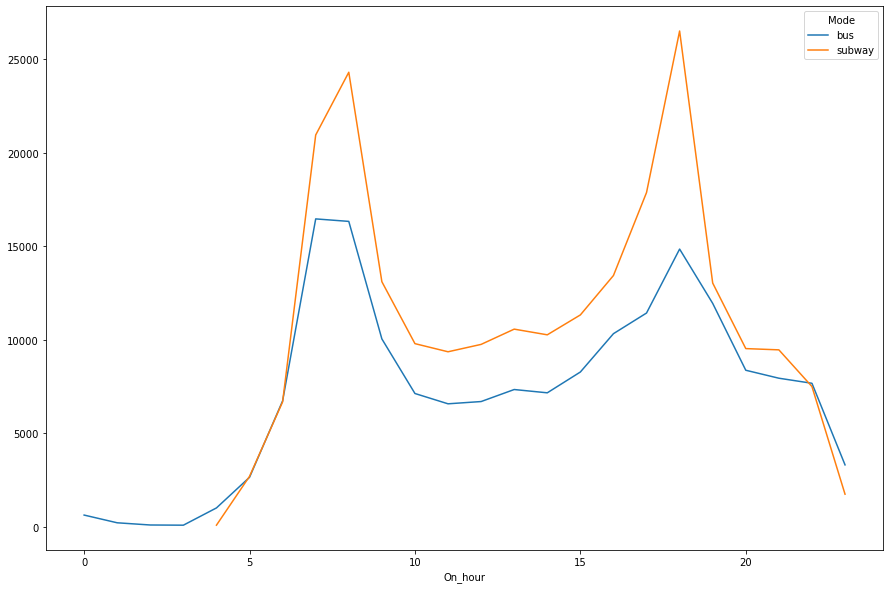

In [14]:
# Compare time-of-day plots between subway and bus : 버스, 지하철의 시간별 통행빈도 분포 그래프
Freq_hour_mode = pd.pivot_table(Cdata, values = 'Card_ID', index = ['On_hour'], columns = ['Mode'], aggfunc = 'count')
Freq_hour_mode.plot(figsize = (15, 10))

### Travel time calcuation and analysis

In [15]:
# Travel time cacluation (unit = minutes)
Cdata['T_time'] = (((Cdata.Off_hour*60)+Cdata.Off_min+(Cdata.Off_sec/60))
                 - ((Cdata.On_hour*60)+Cdata.On_min+(Cdata.On_sec/60)))
Cdata.head(3) # 수단별 통행시간(T_time) 컬럼이 생성되었다. 이건 태그 시간 2개의 차이로 계산한 것이다.
# 두 데이터 포인트의 시간 차이 = Travel time

,Card_ID,Trip_Seq,Leg_Seq,User,Mode,Route,On_station,Off_station,On_hour,On_min,On_sec,Off_hour,Off_min,Off_sec,T_time
0,100001,1,1,normal,subway,20000000,424,328,17,25,55,17,50,15,24.333333
1,100002,1,1,elderly,subway,20000000,204,313,17,9,1,17,34,57,25.933333
2,100003,1,1,normal,subway,20000000,2618,2632,7,40,7,8,8,49,28.700000


In [17]:
# Check the travel time calculated
Cdata.T_time.describe() # 생성된 통행시간의 기술통계량을 알아보았다. 평균 27.56분이다.

count    401493.000000
mean         27.559274
std          20.289457
min           0.016667
25%          11.050000
50%          23.783333
75%          39.666667
max         294.000000
Name: T_time, dtype: float64

In [19]:
# Average travel time by mode
import numpy as np

pd.pivot_table(Cdata, values = 'T_time', index = ['Mode'], aggfunc = np.mean).T

Mode,bus,subway
T_time,17.223091,35.392553


In [18]:
# Average travel time by mode and user : 평균 통행시간분포. 이용자 유형별로 피벗 테이블 생성
pd.pivot_table(Cdata, values = 'T_time', index = ['Mode'], columns = ['User'], aggfunc = np.mean, margins = True)

User,disabled,elderly,kids,normal,teen,All
Mode,,,,,,
bus,NaN,18.903814,9.590381,17.457271,13.347308,17.223091
subway,35.763297,35.891015,29.812296,35.375212,33.231066,35.392553
All,35.763297,35.826985,16.259916,26.977787,21.334675,27.559274


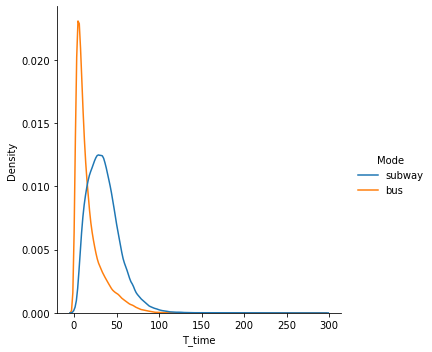

In [19]:
# Comparison of travel time distribution by mode using Kernel density
import seaborn as sns

sns.displot(data = Cdata, x = "T_time", hue = "Mode", kind = "kde") #> 밀도곡선을 그려준다.

### Analysis of linked trip data (trip-chain data)

##### Creating Linked trip data

In [20]:
# Base "liked trip" data
Cdata_C = Cdata.loc[:,['Card_ID','Trip_Seq','User']] # Cdata_C의 베이스가 될 빈 데이터프레임을 생성함
Cdata_C = Cdata_C.drop_duplicates() # 중복값을 제거해버림으로써 “통행자” 정보만 남는다.

Cdata_C

,Card_ID,Trip_Seq,User
0,100001,1,normal
1,100002,1,elderly
2,100003,1,normal
4,100003,2,normal
5,100004,1,disabled
...,...,...,...
401488,269599,2,elderly
401489,269600,1,normal
401490,269600,2,normal
401491,269601,1,normal


In [21]:
# Create colums : 빈 컬럼을 만든다. 다음의 셀들에서 CData를 파싱하게 될 것이다.
Cdata_C['Mode_list'] = [list() for x in range(len(Cdata_C))]
Cdata_C['Mode_set'] = 0

Cdata_C['Origin'] = 0
Cdata_C['Destin'] = 0

Cdata_C['Origin_hh'] = 0
Cdata_C['Origin_mm'] = 0
Cdata_C['Origin_ss'] = 0
Cdata_C['Destin_hh'] = 0
Cdata_C['Destin_mm'] = 0
Cdata_C['Destin_ss'] = 0

Cdata_C['In_time'] = 0
Cdata_C['Tf_time'] = 0
Cdata_C['TT_time'] = 0 

Cdata_C['Tf_num'] = 0

Cdata_C

,Card_ID,Trip_Seq,User,Mode_list,Mode_set,Origin,Destin,Origin_hh,Origin_mm,Origin_ss,Destin_hh,Destin_mm,Destin_ss,In_time,Tf_time,TT_time,Tf_num
0,100001,1,normal,[],0,0,0,0,0,0,0,0,0,0,0,0,0
1,100002,1,elderly,[],0,0,0,0,0,0,0,0,0,0,0,0,0
2,100003,1,normal,[],0,0,0,0,0,0,0,0,0,0,0,0,0
4,100003,2,normal,[],0,0,0,0,0,0,0,0,0,0,0,0,0
5,100004,1,disabled,[],0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401488,269599,2,elderly,[],0,0,0,0,0,0,0,0,0,0,0,0,0
401489,269600,1,normal,[],0,0,0,0,0,0,0,0,0,0,0,0,0
401490,269600,2,normal,[],0,0,0,0,0,0,0,0,0,0,0,0,0
401491,269601,1,normal,[],0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
%%time
# Complete the table (For test, only first 200 data points are addressed)
m = -1

for n in tqdm(range(0,200)):
    if Cdata.Leg_Seq.iloc[n] == 1: # 만약 User의 첫번째 통행일 경우
        
        m = m + 1
        
        Cdata_C.Mode_list.iloc[m].append(Cdata.Mode.iloc[n])
        Cdata_C.Mode_set.iloc[m] = set(Cdata_C.Mode_list.iloc[m])
        Cdata_C.Origin.iloc[m] = Cdata.On_station.iloc[n]
        Cdata_C.Destin.iloc[m] = Cdata.Off_station.iloc[n]
        Cdata_C.Origin_hh.iloc[m] = Cdata.On_hour.iloc[n]
        Cdata_C.Origin_mm.iloc[m] = Cdata.On_min.iloc[n]
        Cdata_C.Origin_ss.iloc[m] = Cdata.On_sec.iloc[n]
        Cdata_C.Destin_hh.iloc[m] = Cdata.Off_hour.iloc[n]
        Cdata_C.Destin_mm.iloc[m] = Cdata.Off_min.iloc[n]
        Cdata_C.Destin_ss.iloc[m] = Cdata.Off_sec.iloc[n]
        Cdata_C.In_time.iloc[m] = Cdata.T_time.iloc[n]
        Cdata_C.Tf_time.iloc[m] = 0
        Cdata_C.TT_time.iloc[m] = Cdata_C.In_time.iloc[m]
        Cdata_C.Tf_num.iloc[m] = 0
    
    else: # 첫번째 통행이 아닐 경우(환승했을 경우)
        Cdata_C.Mode_list.iloc[m].append(Cdata.Mode.iloc[n])
        Cdata_C.Mode_set.iloc[m] = set(Cdata_C.Mode_list.iloc[m])
        #Cdata_C.Origin.iloc[m]=Cdata.On_station.iloc[n]
        Cdata_C.Destin.iloc[m] = Cdata.Off_station.iloc[n]
        #Cdata_C.Origin_hh.iloc[m]=Cdata.On_hour.iloc[n]
        #Cdata_C.Origin_mm.iloc[m]=Cdata.On_min.iloc[n]
        #Cdata_C.Origin_ss.iloc[m]=Cdata.On_sec.iloc[n]
        Cdata_C.Destin_hh.iloc[m] = Cdata.Off_hour.iloc[n]
        Cdata_C.Destin_mm.iloc[m] = Cdata.Off_min.iloc[n]
        Cdata_C.Destin_ss.iloc[m] = Cdata.Off_sec.iloc[n]
        Cdata_C.In_time.iloc[m] = Cdata_C.In_time.iloc[m]+Cdata.T_time.iloc[n]
        Cdata_C.Tf_time.iloc[m] = (Cdata_C.Tf_time.iloc[m]
                                 + (((Cdata.On_hour.iloc[n] * 60) + Cdata.On_min.iloc[n] + (Cdata.On_sec.iloc[n]/60))
                                 - ((Cdata.Off_hour.iloc[n-1] * 60) + Cdata.Off_min.iloc[n-1] + (Cdata.Off_sec.iloc[n-1]/60))))
        Cdata_C.TT_time.iloc[m] = Cdata_C.In_time.iloc[m] + Cdata_C.Tf_time.iloc[m]
        Cdata_C.Tf_num.iloc[m] = Cdata_C.Tf_num.iloc[m] + 1
            
Cdata_C 

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]C:\dev\Anaconda_3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 97.67it/s]

Wall time: 2.1 s


,Card_ID,Trip_Seq,User,Mode_list,Mode_set,Origin,Destin,Origin_hh,Origin_mm,Origin_ss,Destin_hh,Destin_mm,Destin_ss,In_time,Tf_time,TT_time,Tf_num
0,100001,1,normal,[subway],{subway},424,328,17,25,55,17,50,15,24.333333,0.000000,24.333333,0
1,100002,1,elderly,[subway],{subway},204,313,17,9,1,17,34,57,25.933333,0.000000,25.933333,0
2,100003,1,normal,"[subway, bus]","{subway, bus}",2618,9002129,7,40,7,8,15,1,29.366667,5.533333,34.900000,1
4,100003,2,normal,[subway],{subway},2632,2618,20,29,13,21,4,17,35.066667,0.000000,35.066667,0
5,100004,1,disabled,[subway],{subway},311,157,8,12,27,8,49,34,37.116667,0.000000,37.116667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401488,269599,2,elderly,[],0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0
401489,269600,1,normal,[],0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0
401490,269600,2,normal,[],0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0
401491,269601,1,normal,[],0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0


In [23]:
%%time
# Complete the table(Entire data): it takes 1-2 hours.
## Mode_list, Mode_set, Origin, Destin, Origin_hh, Origin_mm, Origin_ss, Destin_hh, Destin_mm, Destin_ss, In_time, Tf_time, TT_time, Tf_num 채우기

### Tf : Transfer(환승). Tf_num == 0인 경우, Tf_time은 당연히 0이 된다.
### TT_time : Total Travel Time. 

m = -1

for n in tqdm(range(0,len(Cdata))): 
    if Cdata.Leg_Seq.iloc[n] == 1:  # 만약 User의 첫번째 Trip lag일 경우
        
        m = m + 1 # 이게 바로 CData_C의 행번호가 될 것임
        
        Cdata_C.Mode_list.iloc[m].append(Cdata.Mode.iloc[n]) # 수단 리스트에 사용한 수단을 추가
        Cdata_C.Mode_set.iloc[m] = set(Cdata_C.Mode_list.iloc[m]) # 사용한 수단 리스트를 set()을 사용해 집합으로 만들기
        Cdata_C.Origin.iloc[m] = Cdata.On_station.iloc[n] # 기점
        Cdata_C.Destin.iloc[m] = Cdata.Off_station.iloc[n] # 종점
        
        Cdata_C.Origin_hh.iloc[m] = Cdata.On_hour.iloc[n] # 기점 출발 시
        Cdata_C.Origin_mm.iloc[m] = Cdata.On_min.iloc[n] # 기점 출발 분
        Cdata_C.Origin_ss.iloc[m] = Cdata.On_sec.iloc[n] # 기점 출발 초
        Cdata_C.Destin_hh.iloc[m] = Cdata.Off_hour.iloc[n] # 종점 도착 시
        Cdata_C.Destin_mm.iloc[m] = Cdata.Off_min.iloc[n] # 종점 도착 분
        Cdata_C.Destin_ss.iloc[m] = Cdata.Off_sec.iloc[n] # 종점 도착 초
        
        Cdata_C.In_time.iloc[m] = Cdata.T_time.iloc[n] # 총 차내통행시간 시간(in-vehicle-time)
        Cdata_C.Tf_time.iloc[m] = 0 # 환승시간은 0
        Cdata_C.TT_time.iloc[m] = Cdata_C.In_time.iloc[m] # Total Travel Time
        Cdata_C.Tf_num.iloc[m] = 0 # 환승횟수는 0
        
    else: # 첫번째 Trip lag가 아닐 경우(환승했을 경우)
        Cdata_C.Mode_list.iloc[m].append(Cdata.Mode.iloc[n]) # 수단 리스트에 사용한 수단을 추가
        Cdata_C.Mode_set.iloc[m] = set(Cdata_C.Mode_list.iloc[m]) # 사용한 수단 리스트를 set()을 사용해 집합으로 만들어 투입
        #Cdata_C.Origin.iloc[m]=Cdata.On_station.iloc[n]
        Cdata_C.Destin.iloc[m] = Cdata.Off_station.iloc[n] # 종점만 업데이트
        #Cdata_C.Origin_hh.iloc[m]=Cdata.On_hour.iloc[n]
        #Cdata_C.Origin_mm.iloc[m]=Cdata.On_min.iloc[n]
        #Cdata_C.Origin_ss.iloc[m]=Cdata.On_sec.iloc[n]
        Cdata_C.Destin_hh.iloc[m] = Cdata.Off_hour.iloc[n] # 종점 도착 시 업데이트
        Cdata_C.Destin_mm.iloc[m] = Cdata.Off_min.iloc[n] # 종점 도착 분 업데이트
        Cdata_C.Destin_ss.iloc[m] = Cdata.Off_sec.iloc[n] # 종점 도착 초 업데이트
        
        Cdata_C.In_time.iloc[m] = Cdata_C.In_time.iloc[m] + Cdata.T_time.iloc[n] # 차내통행시간 업데이트
        
        Cdata_C.Tf_time.iloc[m] = (Cdata_C.Tf_time.iloc[m]
                                 + (((Cdata.On_hour.iloc[n] * 60) + Cdata.On_min.iloc[n] + (Cdata.On_sec.iloc[n]/60))
                                 - ((Cdata.Off_hour.iloc[n-1] * 60) + Cdata.Off_min.iloc[n-1] + (Cdata.Off_sec.iloc[n-1]/60))))
        
        Cdata_C.TT_time.iloc[m] = Cdata_C.In_time.iloc[m] + Cdata_C.Tf_time.iloc[m] # Total Travel Time = 차내통행시간 + 환승시간
        
        Cdata_C.Tf_num.iloc[m] = Cdata_C.Tf_num.iloc[m] + 1 # 환승횟수에 1 추가
            
Cdata_C

  0%|                                                                                       | 0/401493 [00:00<?, ?it/s]C:\dev\Anaconda_3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|████████████████████████████████████████████████████████████████████████| 401493/401493 [1:09:49<00:00, 95.84it/s]

Wall time: 1h 9min 49s


,Card_ID,Trip_Seq,User,Mode_list,Mode_set,Origin,Destin,Origin_hh,Origin_mm,Origin_ss,Destin_hh,Destin_mm,Destin_ss,In_time,Tf_time,TT_time,Tf_num
0,100001,1,normal,"[subway, subway]",{subway},424,328,17,25,55,17,50,15,24.333333,0.000000,24.333333,0
1,100002,1,elderly,"[subway, subway]",{subway},204,313,17,9,1,17,34,57,25.933333,0.000000,25.933333,0
2,100003,1,normal,"[subway, bus, subway, bus]","{subway, bus}",2618,9002129,7,40,7,8,15,1,29.366667,5.533333,34.900000,1
4,100003,2,normal,"[subway, subway]",{subway},2632,2618,20,29,13,21,4,17,35.066667,0.000000,35.066667,0
5,100004,1,disabled,"[subway, subway]",{subway},311,157,8,12,27,8,49,34,37.116667,0.000000,37.116667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401488,269599,2,elderly,[subway],{subway},152,2820,15,4,27,16,16,13,71.766667,0.000000,71.766667,0
401489,269600,1,normal,[subway],{subway},410,155,8,20,7,8,53,16,33.150000,0.000000,33.150000,0
401490,269600,2,normal,[subway],{subway},155,414,17,30,58,17,55,14,24.266667,0.000000,24.266667,0
401491,269601,1,normal,[subway],{subway},2627,222,9,39,39,10,17,27,37.800000,0.000000,37.800000,0


In [24]:
save_file = 'Cdata_C.csv'
save_path = os.path.join(data_dir, save_file)

In [25]:
Cdata_C.to_csv(save_path)